

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Graffiti with Video





Import Libraries & get url


### get url

In [2]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
#url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'
startdate = "'2016-12-08'"
url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/gbya-e2d3.csv?$where=opened>='2016-12-08'


In [3]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Set Display Column with wider so no problem with Media URL series

In [5]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [7]:
df = pd.read_csv(url)

In [8]:
df.shape

(43, 16)

#### wow, 5 days > 1000 reports

In [9]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6610035,12/08/2016 11:55:27 PM,NaN,12/09/2016 01:37:34 AM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"979 BRYANT ST, SAN FRANCISCO, CA, 94103",6,Showplace Square,"(37.772840819331, -122.4063149048)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584a63633da19793c74c5593/report.jpg
1,6610020,12/08/2016 11:13:18 PM,NaN,12/08/2016 11:37:20 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of AUSTIN ST and VAN NESS AVE,2,Cathedral Hill,"(37.7889425801396, -122.422145392144)",Open311,NaN
2,6610005,12/08/2016 10:52:18 PM,NaN,12/08/2016 10:52:18 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of AUSTIN ST and VAN NESS AVE,2,Cathedral Hill,"(37.7889425801396, -122.422145392144)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584a54953da19793c74c5517/report.jpg


In [10]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [11]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6610035,2016-12-08 23:55:27,NaT,2016-12-09 01:37:34,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"979 BRYANT ST, SAN FRANCISCO, CA, 94103",6,Showplace Square,"(37.772840819331, -122.4063149048)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584a63633da19793c74c5593/report.jpg
1,6610020,2016-12-08 23:13:18,NaT,2016-12-08 23:37:20,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of AUSTIN ST and VAN NESS AVE,2,Cathedral Hill,"(37.7889425801396, -122.422145392144)",Open311,NaN
2,6610005,2016-12-08 22:52:18,NaT,2016-12-08 22:52:18,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of AUSTIN ST and VAN NESS AVE,2,Cathedral Hill,"(37.7889425801396, -122.422145392144)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584a54953da19793c74c5517/report.jpg


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=8.0, right=8.0
  'left=%s, right=%s') % (left, right))


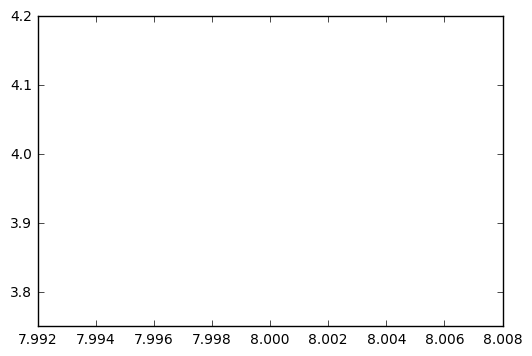

In [12]:
df.Closed.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=8.0, right=8.0
  'left=%s, right=%s') % (left, right))


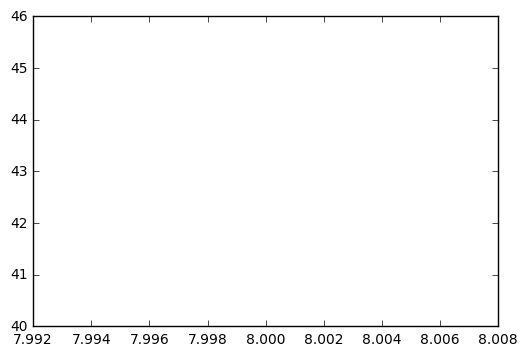

In [13]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3.0, right=3.0
  'left=%s, right=%s') % (left, right))


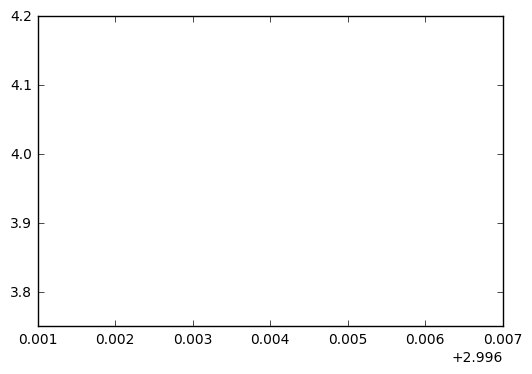

In [14]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [15]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [16]:

df['Request Details'].value_counts()


Encampment Cleanup    43
Name: Request Details, dtype: int64

In [17]:
df['Supervisor District'].value_counts().sort_index()



1      1
2      2
3      3
5      3
6     18
8      4
9      7
10     5
Name: Supervisor District, dtype: int64

In [18]:
df.Neighborhood.value_counts()

South of Market     10
Mission              8
Lower Nob Hill       3
Haight Ashbury       3
Cathedral Hill       2
Mission Bay          2
Castro               2
Showplace Square     2
Rincon Hill          2
Potrero Hill         1
Tenderloin           1
Inner Richmond       1
Duboce Triangle      1
Civic Center         1
Apparel City         1
Dolores Heights      1
Silver Terrace       1
Name: Neighborhood, dtype: int64

In [19]:
df[df.Neighborhood == 'Mission'].head(8)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
5,6609930,2016-12-08 21:26:21,NaT,2016-12-08 21:26:21,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 18TH ST and FLORIDA ST,9,Mission,"(37.7617009755953, -122.411090102877)",Open311,NaN
14,6608999,2016-12-08 14:54:46,2016-12-08 15:55:05,2016-12-08 15:55:05,Closed,Area Cleaned - no needles found but need a crew for the tents andpolice for the homeless hear,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"2050 BRYANT ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.761015579909, -122.410534254165)",Open311,NaN
15,6608972,2016-12-08 14:50:00,NaT,2016-12-08 15:09:11,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"517 YORK ST, SAN FRANCISCO, CA, 94110",10,Mission,"(37.762709273118, -122.409066623248)",Open311,NaN
18,6608613,2016-12-08 13:27:09,NaT,2016-12-08 13:28:37,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"2719 16TH ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.765365882843, -122.413546473062)",Voice In,NaN
22,6607889,2016-12-08 10:39:49,2016-12-08 12:55:05,2016-12-08 12:55:05,Closed,Area Cleaned -,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"2091 FOLSOM ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.763852423965, -122.415117797707)",Voice In,NaN
26,6607460,2016-12-08 09:22:30,NaT,2016-12-08 09:25:19,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 16TH ST and HARRISON ST,9,Mission,"(37.7654474943791, -122.413105187419)",Voice In,NaN
33,6607077,2016-12-08 08:16:09,NaT,2016-12-08 08:16:09,Open,in progress,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1863 MISSION ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.767249811484, -122.419699355551)",Web Self Service,http://mobile311.sfgov.org/media/san_francisco/report/photos/5849873e3da19793c74c3d4f/20161207_155933537_iOS.jpg
35,6606993,2016-12-08 07:51:26,NaT,2016-12-08 07:51:26,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"44 POTRERO AVE, SAN FRANCISCO, CA, 94103",10,Mission,"(37.768646511805, -122.408012939533)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584981703da19793c74c3c6b/report.jpg



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [20]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']


In [21]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:3])


0    http://mobile311.sfgov.org/media/san_francisco/report/photos/584a63633da19793c74c5593/report.jpg
1    http://mobile311.sfgov.org/media/san_francisco/report/photos/584a54953da19793c74c5517/report.jpg
2    http://mobile311.sfgov.org/media/san_francisco/report/photos/5849ee1e3da19793c74c4df3/report.jpg
Name: Media URL, dtype: object


In [22]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/584a63633da19793c74c5593/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/584a63633da19793c74c5593/report.jpg


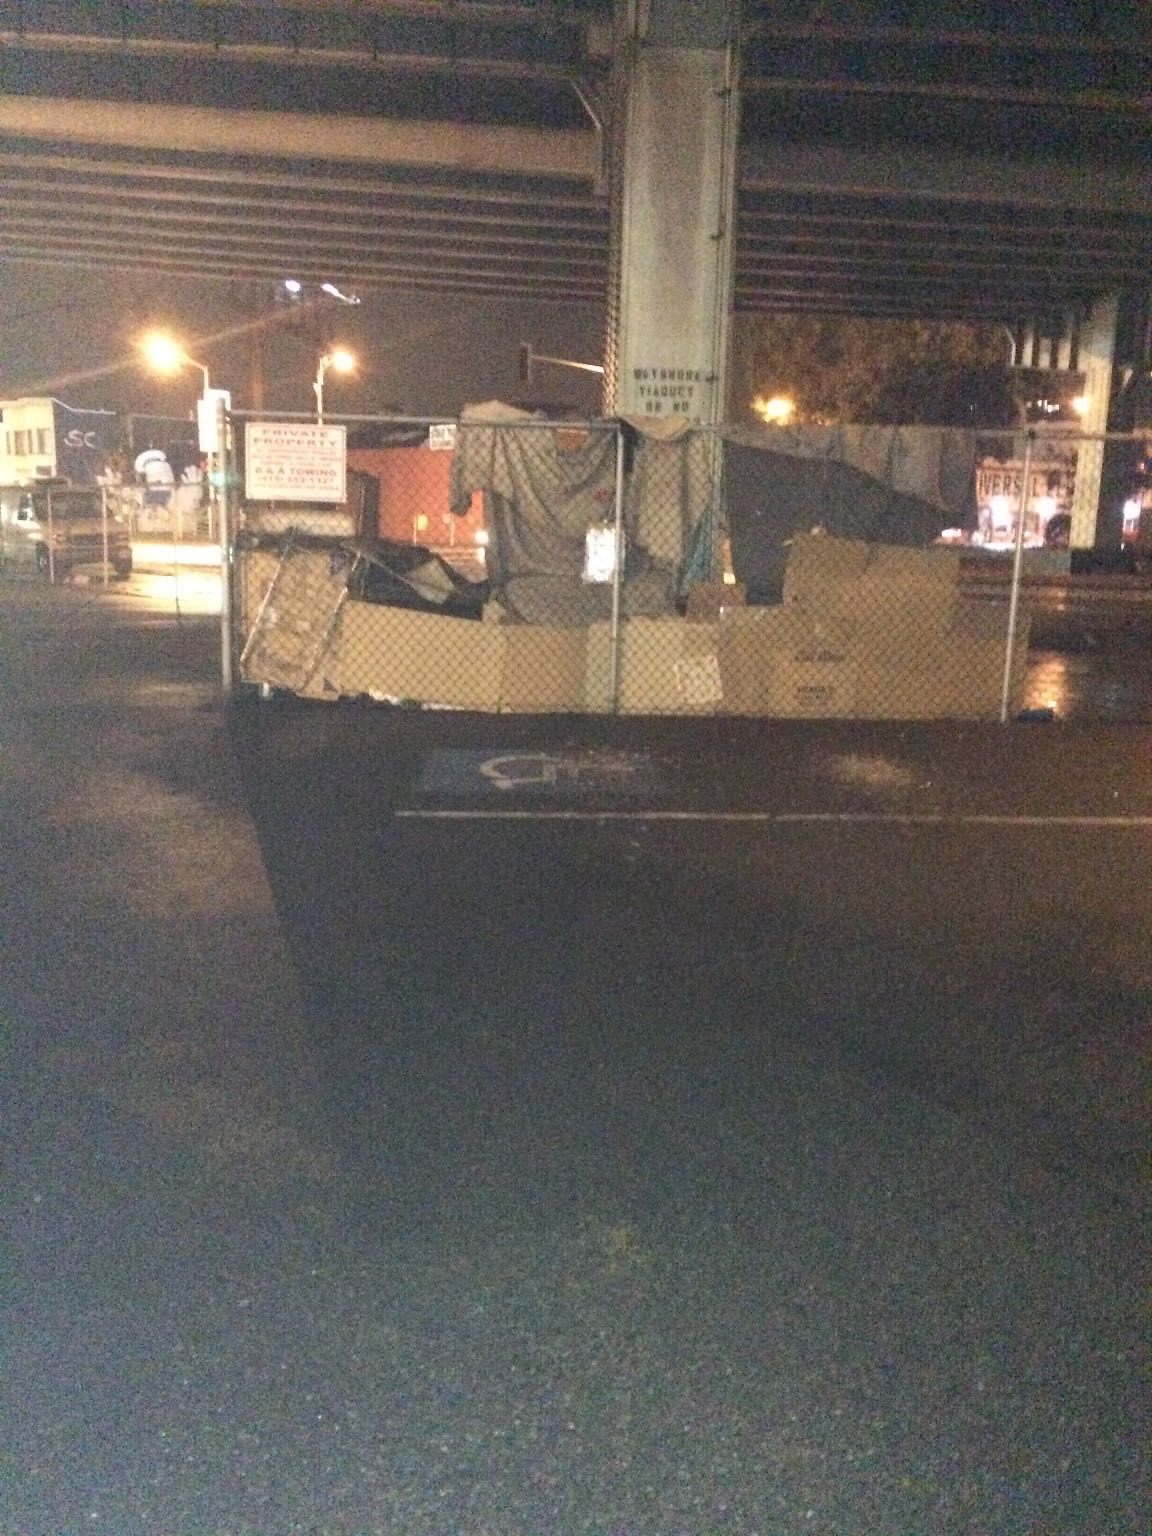

In [23]:
print(images[0])
Image(images[0])


In [24]:
!pwd

/home/gdillon/JupyterPractice/homeless_311


In [25]:
images[:80].to_csv("./imagelist.txt", index=False)

In [54]:

%cd assets/
!wget -i ../imagelist.txt

!sleep 30
#%ls | gawk 'BEGIN{ a=1 }{ printf "mv \"%s\" %04d.jpg\n", $0, a++ }' | bash
#!sleep 10
#!convert -delay 50 *.jpg out.mp4
%cd ..


/home/gdillon/JupyterPractice/graffiti_SF311/assets
--2016-12-09 12:24:39--  http://mobile311.sfgov.org/media/san_francisco/report/photos/584903753da19793c74c3848/report.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322478 (315K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 314.92K  1.31MB/s    in 0.2s    

2016-12-09 12:24:39 (1.31 MB/s) - 'report.jpg' saved [322478/322478]

--2016-12-09 12:24:39--  http://mobile311.sfgov.org/media/san_francisco/report/photos/5839d3633da18eff3daa3174/report.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 122845 (120K) [image/jpeg]
Saving to: 'report.jpg.1'

report.jpg.1        100%[===================>] 119.97K  --.-KB/s    in 0.001s  

2016-12-09 12:24:39 (149 MB/s) - 'report.j

In [26]:
#!convert -delay 50 *.jpg out.mp4


In [27]:
!ls


San+Fran +Graffiti pull one day.ipynb	 assets		pipevid.sh
San+Francisco+Graffiti with Video.ipynb  imagelist.txt


In [28]:
Image('report2.jpg')